In [1]:
import nilearn.plotting as plotting
import nilearn.image as img
from nilearn.reporting import get_clusters_table
import glob
from decouple import config
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
path = os.path.join(config('happy'), '2ndlevel', 'mixed_model')
imgs = glob.glob(f'{path}/*.nii.gz')
pvals = [images for images in imgs if 'tfce_vstat_fwep' in images]
t_stat = [images for images in imgs if 'tfce_vstat' in images]
mask = img.load_img([images for images in imgs if 'mask_img' in images][0])

Pick contrast

In [3]:
group = {
    'vstat': img.load_img([t_stat_img for t_stat_img in t_stat if 'c1' in t_stat_img]),
    'pvals': img.load_img([pvals_img for pvals_img in pvals if 'c1' in pvals_img])
}

time = {
    'vstat': img.load_img([t_stat_img for t_stat_img in t_stat if 'c2' in t_stat_img]),
    'pvals': img.load_img([pvals_img for pvals_img in pvals if 'c2' in pvals_img])
}

interaction = {
    'vstat': img.load_img([t_stat_img for t_stat_img in t_stat if 'c3' in t_stat_img]),
    'pvals': img.load_img([pvals_img for pvals_img in pvals if 'c3' in pvals_img])
}

Plotting pvalues

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


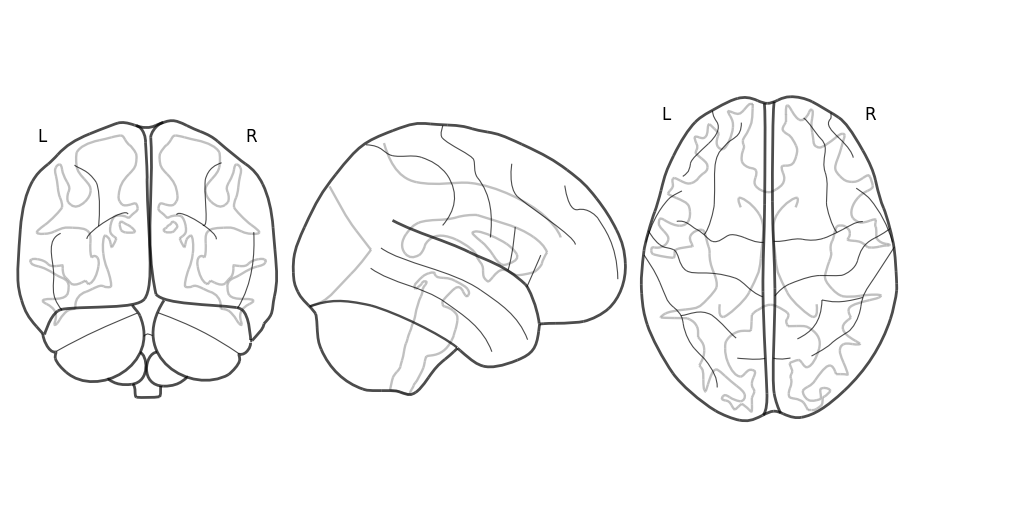

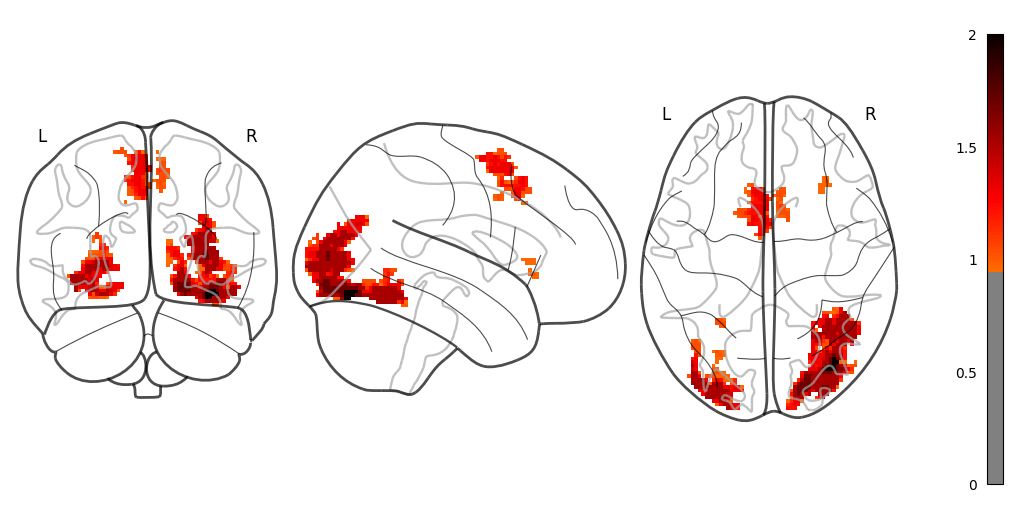

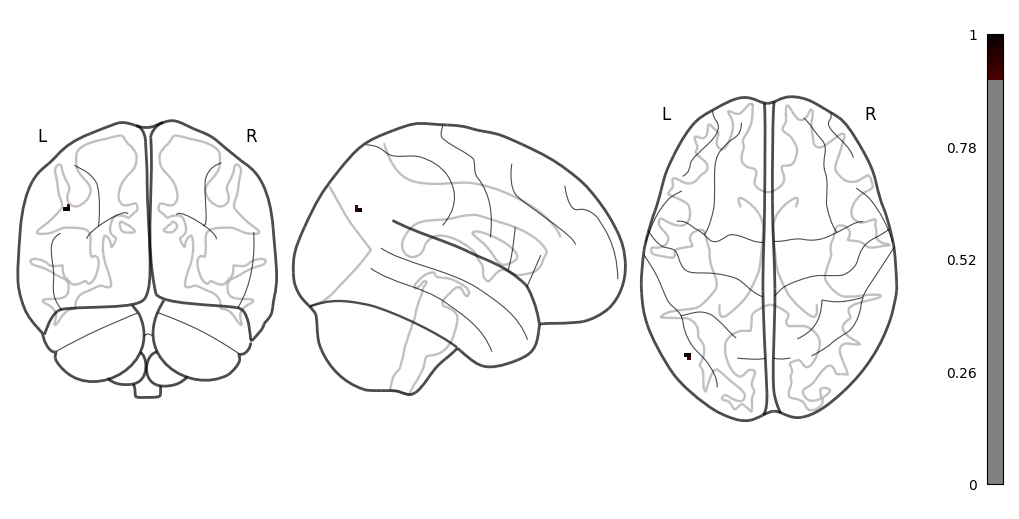

In [5]:
contrasts = [group, time, interaction]

for contrast in contrasts:
    fig = plt.figure(figsize=(10, 5))
    plotting.plot_glass_brain(contrast['pvals'], colorbar=True, plot_abs=False,figure=fig,  vmin=0.95, threshold=0.95,)

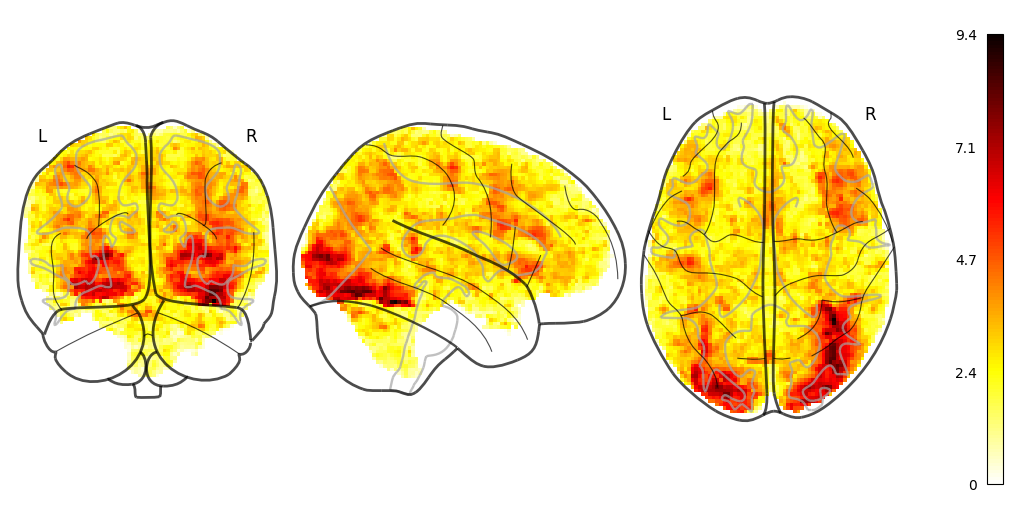

In [33]:
fig = plt.figure(figsize=(10, 5))
plotting.plot_glass_brain(t_stat, colorbar=True, plot_abs=True, figure=fig )
plt.show()

In [8]:
pval_table = get_clusters_table(time['pvals'], stat_threshold=0.0,
                           cluster_threshold=10.0).set_index('Cluster ID', drop=True)
pval_table['Pval'] = abs(1 - pval_table['Peak Stat'])
pval_table = pval_table.drop(columns='Peak Stat')

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(


In [42]:
tval_results = get_clusters_table(t_stat, stat_threshold=0.95,
                           cluster_threshold=10.0).set_index('Cluster ID', drop=True)

In [43]:
res_table = pd.merge(pval_table, tval_results, how='left', left_on=['X', 'Y', 'Z'], right_on=['X', 'Y', 'Z'])